## Logistic Classifier for Surigcal Outcome of Horse Colic

In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ## import model
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize

In [2]:
#Read pre processed data into pandas df and drop the index column that comes in from the spreadsheet
df=pd.read_excel('Data/HorseColicData_DeathTarget.xlsx',index=False)
df.shape

(368, 20)

In [3]:
df=df.drop('Unnamed: 0',axis=1)
df

,surgery,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain a subjective judgement of the horses pain level,peristalsis,abdominal distension,packed cell volume,total protein,outcome,surgical lesion,type of lesion,Target,location of lesion
0,2,1,38.5,66,28,3,3,0,2,5,4,4,45.0,1,2,2,1,1,1
1,1,1,39.2,88,20,0,0,4,1,3,4,2,50.0,1,3,2,2,1,2
2,2,1,38.3,40,24,1,1,3,1,3,3,1,33.0,0,1,2,0,0,0
3,1,9,39.1,164,84,4,1,6,2,2,4,4,48.0,0,2,1,2,1,2
4,2,1,37.3,104,35,0,0,6,2,0,0,0,74.0,0,2,2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2,1,38.6,60,30,1,1,3,1,4,2,2,40.0,0,1,1,2,0,3
364,2,1,37.8,42,40,1,1,1,1,1,3,1,36.0,0,1,2,1,0,4
365,1,1,38.0,60,12,1,1,2,1,2,1,1,44.0,1,3,1,2,1,2
366,2,1,38.0,42,12,3,0,3,1,1,1,1,37.0,1,1,2,1,0,3


Verify target variable has only 2 possible values and recode to 0 or 1

In [4]:
SimpleBinary=df
SimpleBinary['surgical lesion'].value_counts()

1    232
2    136
Name: surgical lesion, dtype: int64

In [5]:
SimpleBinary['surgical lesion'].replace(to_replace =1, value =0,inplace=True)
SimpleBinary['surgical lesion'].replace(to_replace =2, value =1,inplace=True)

For this model, I have decided to take the additional step of creating a holdout dataset. This will be used as the final test of our finished model and should provide us with the most accurate measure of its effectiveness, as the model will have never seen this data before. 25 records are randomaly selected from our dataframe and removed.

In [6]:
HoldoutSet=SimpleBinary.sample(n=50)

SimpleBinary=SimpleBinary.merge(HoldoutSet, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

SimpleBinary=SimpleBinary.drop('_merge',axis=1)
SimpleBinary.shape

(317, 19)

In [7]:
#set target variable
SimpleBinary['outcome'] = SimpleBinary['Target']

SimpleBinary['Target'] = SimpleBinary['surgical lesion']

SimpleBinary['Target'].value_counts()
SimpleBinary=SimpleBinary.astype(float)

In [8]:
#set features and remove target
X = SimpleBinary.drop(columns= ['surgical lesion','Target'])
X.columns

Index(['surgery', 'Age', 'rectal temperature', 'pulse', 'respiratory rate',
       'temperature of extremities', 'peripheral pulse', 'mucous membranes',
       'capillary refill time',
       'pain  a subjective judgement of the horses pain level', 'peristalsis',
       'abdominal distension', 'packed cell volume', 'total protein',
       'outcome', 'type of lesion', 'location of lesion'],
      dtype='object')

In [9]:
y = SimpleBinary.Target ## creating target values
y.value_counts()

0.0    205
1.0    112
Name: Target, dtype: int64

Split the data into train and test, with a test size of 25% of the total dataset. randomstate 40 is used for reproducability of exercise. instantiate the ligistic regression model and fit the training data to it. 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .15, random_state = 40)

logreg = LogisticRegression(penalty = 'none', max_iter= 10000,random_state = 40) ## instantiate

logreg.fit(X_train, Y_train) ## fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#Check the accuracy scores of the classification model using the test data
score = logreg.score(X_test,Y_test)
score

0.8125

In [12]:
#make predictions from the test data
predictions = logreg.predict(X_test)

In [13]:
predictions

array([1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.])

In the below confusion matrix we see an overall prediction accuracy of approximately 78%. No false negative outcomes are observed. 2 false posatives are.

In [14]:
cm = metrics.confusion_matrix(Y_test, predictions)

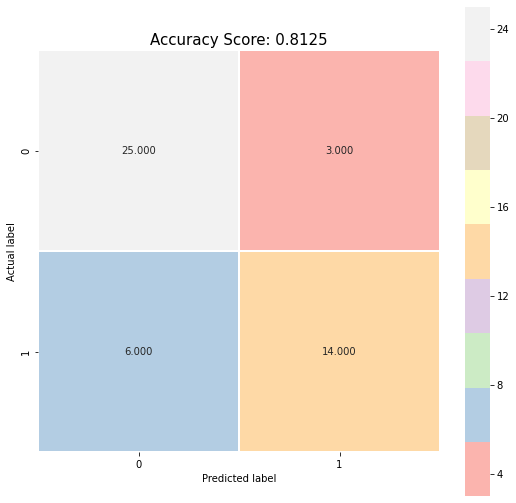

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

We will down attempt to do some feature selection, removing potential noise form uncorrelated variables. In this first step those features with a correlation of less than .1 to the target feature are removed from the dataframe.

In [16]:
#remove values with correlation less than .1
Corrs=SimpleBinary[SimpleBinary.columns].corr()['outcome']
remove2=Corrs[np.sqrt(Corrs**2) < 0.1].index

In [17]:
remove2

Index(['Age', 'rectal temperature', 'respiratory rate', 'total protein'], dtype='object')

In [18]:
SimpleBinary2=SimpleBinary.drop(list(remove2), axis=1)
SimpleBinary2

,surgery,pulse,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain a subjective judgement of the horses pain level,peristalsis,abdominal distension,packed cell volume,outcome,surgical lesion,type of lesion,Target,location of lesion
0,2.0,66.0,3.0,3.0,0.0,2.0,5.0,4.0,4.0,45.0,1.0,1.0,1.0,1.0,1.0
1,1.0,88.0,0.0,0.0,4.0,1.0,3.0,4.0,2.0,50.0,1.0,1.0,2.0,1.0,2.0
2,2.0,40.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,33.0,0.0,1.0,0.0,1.0,0.0
3,1.0,164.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,48.0,1.0,0.0,2.0,0.0,2.0
4,2.0,104.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,74.0,1.0,1.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2.0,60.0,1.0,1.0,3.0,1.0,4.0,2.0,2.0,40.0,0.0,0.0,2.0,0.0,3.0
364,2.0,42.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,36.0,0.0,1.0,1.0,1.0,4.0
365,1.0,60.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,44.0,1.0,0.0,2.0,0.0,2.0
366,2.0,42.0,3.0,0.0,3.0,1.0,1.0,1.0,1.0,37.0,0.0,1.0,1.0,1.0,3.0


Run it again low corrs gone

In [19]:
X = SimpleBinary2.drop(columns= ['outcome','Target'])
#X = pd.get_dummies(X)
X.columns

Index(['surgery', 'pulse', 'temperature of extremities', 'peripheral pulse',
       'mucous membranes', 'capillary refill time',
       'pain  a subjective judgement of the horses pain level', 'peristalsis',
       'abdominal distension', 'packed cell volume', 'surgical lesion',
       'type of lesion', 'location of lesion'],
      dtype='object')

In [20]:
y = SimpleBinary2.Target ## creating target values
y.value_counts()

0.0    205
1.0    112
Name: Target, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ## import model


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .15, random_state = 40)

logreg = LogisticRegression(penalty = 'none', max_iter= 10000,random_state = 40) ## instantiate

logreg.fit(X_train, Y_train) ## fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
## Accuracy Scores
trainscore = logreg.score(X_train,Y_train)
testscore = logreg.score(X_test,Y_test)

print(trainscore)
print(testscore)

1.0
1.0


In [23]:
predictions = logreg.predict(X_test)

In [24]:
predictions

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.])

In [25]:
cm = metrics.confusion_matrix(Y_test, predictions)

A greatly increased test accuracy based on the removal of the above variables is observed.

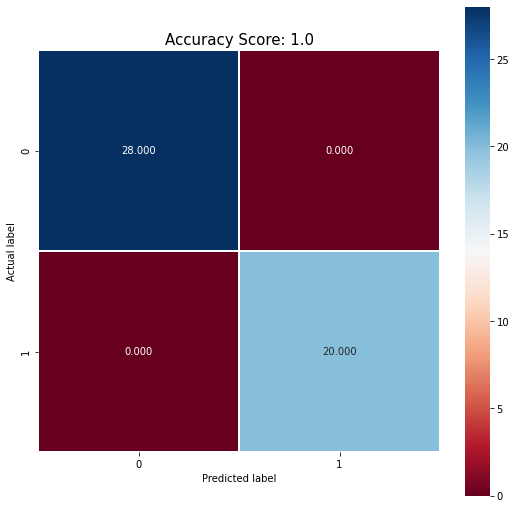

In [26]:
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(testscore)
plt.title(all_sample_title, size = 15);
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

Validating the model via Cross Validation, k folds used as dataset isnt huge orig run time * k times
https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

In [27]:
# 10-fold cross-validation 
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         1.         1.         1.         0.96875    1.
 1.         1.         1.         0.93548387]


In [28]:
print(scores.mean())

0.9904233870967742


In [29]:
Cvals=[0.001,0.01,0.1,1,10,100]
k_scores = []
for c in Cvals:
    logreg = LogisticRegression(max_iter= 10000,random_state = 40,C=c) ## instantiate

    scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7128024193548388, 0.8547379032258065, 0.9525201612903226, 1.0, 1.0, 1.0]


In [30]:
BestC=Cvals[k_scores.index(max(k_scores))]

In [31]:
solve = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
k_scores = []
for s in solve:
    logreg = LogisticRegression(max_iter= 1000000,random_state = 40,solver=s,C=BestC) ## instantiate

    scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[1.0, 1.0, 0.9967741935483871, 0.9904233870967744, 0.9809475806451612]


In [32]:
BestS=solve[k_scores.index(max(k_scores))]

In [33]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
logreg = LogisticRegression(max_iter= 1000000,random_state = 40,C=BestC,solver=BestS) ## instantiate
logreg.fit(X_train, Y_train) ## fit
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores.mean())

1.0


In [34]:
Y_test.value_counts()


0.0    28
1.0    20
Name: Target, dtype: int64

In [35]:
#Checking null accuracy
Y_test.value_counts().head(1) / len(Y_test)


0.0    0.583333
Name: Target, dtype: float64

In [36]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [37]:
print('True:', Y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1.]
Pred: [0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1.]


In [38]:
#Checking Distribution

In [39]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.05003744, 0.02680683, 0.04490347, 0.77517999, 0.96802895,
       0.95440026, 0.92569691, 0.01841354, 0.93819447, 0.02213543,
       0.02300819, 0.01055405, 0.9196652 , 0.96227653, 0.03267899,
       0.97729192, 0.68342951, 0.03440296, 0.96608775, 0.02581689,
       0.04564365, 0.02437673, 0.01161222, 0.01911457, 0.97632556,
       0.05435254, 0.04274269, 0.03197185, 0.02863319, 0.01322174,
       0.02226541, 0.57863194, 0.77861551, 0.03623631, 0.03922251,
       0.96948654, 0.03405772, 0.01582229, 0.04462388, 0.02619032,
       0.9751473 , 0.64342488, 0.02717728, 0.9788525 , 0.98544806,
       0.08238964, 0.84018809, 0.96184258])

Text(0, 0.5, 'Frequency')

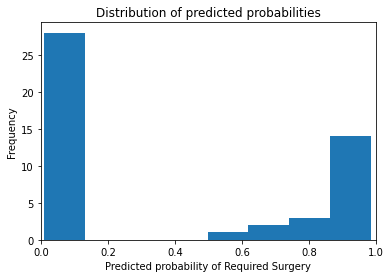

In [40]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Distribution of predicted probabilities')
plt.xlabel('Predicted probability of Required Surgery')
plt.ylabel('Frequency')

In [41]:
print(metrics.confusion_matrix(Y_test, y_pred_class))


[[28  0]
 [ 0 20]]


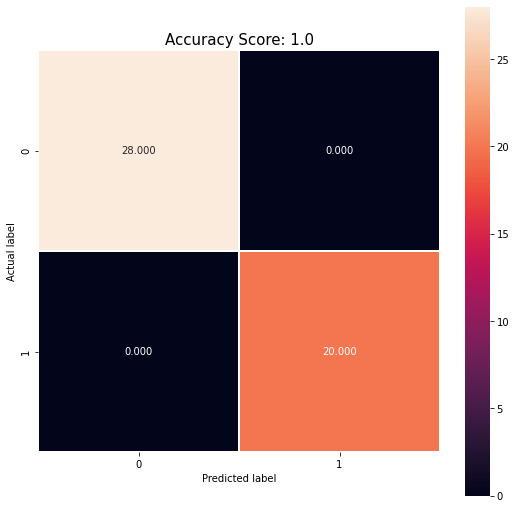

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap((metrics.confusion_matrix(Y_test, y_pred_class)), annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format((metrics.accuracy_score(Y_test, y_pred_class)))
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

Testting the holdout set

In [43]:
HoldoutSet=HoldoutSet.drop(list(remove2), axis=1)


In [44]:
X = HoldoutSet.drop(columns= ['outcome','Target'])
#X = pd.get_dummies(X)
X.columns

Index(['surgery', 'pulse', 'temperature of extremities', 'peripheral pulse',
       'mucous membranes', 'capillary refill time',
       'pain  a subjective judgement of the horses pain level', 'peristalsis',
       'abdominal distension', 'packed cell volume', 'surgical lesion',
       'type of lesion', 'location of lesion'],
      dtype='object')

In [45]:
y = HoldoutSet.Target ## creating target values
y.value_counts()

0    39
1    11
Name: Target, dtype: int64

In [46]:
#scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
#print(scores.mean())
## Accuracy Scores
holscore = logreg.score(X,y)
#testscore = logreg.score(X_test,Y_test)

print(trainscore)
#print(testscore)

1.0


In [47]:
predictions = logreg.predict(X)
predictions


array([1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.])

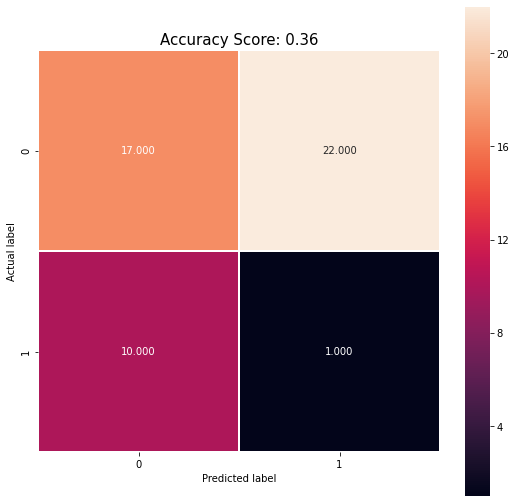

In [48]:
metrics.confusion_matrix(y, logreg.predict(X))


plt.figure(figsize=(9,9))
sns.heatmap(metrics.confusion_matrix(y, logreg.predict(X)), annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format((metrics.accuracy_score(y, logreg.predict(X))))
plt.title(all_sample_title, size = 15);
plt.savefig('confusionmatrix_SurgeryHoldoutData.png')
plt.show()